# A Simple Mapper Tutorial

This notebook will walk you through the basic steps of creating and visualizing a mapper graph.<br>
We will use the python package called KeplerMapper.

We can think of mapper as two-step clustering, guided by something called a *lens* or a *filter function*.<br>
We use this *lens* to divide our data into smaller overlapping chunks (kmapper calls them cubes), i.e., a data point may fall into two or more chunks. This part of the process is called defining a *cover*.<br>
Then we apply our favorite clustering algorithm to each chunk separately.<br>
Lastly, we construct a graph where each node of the graph corresponds to a cluster from the earlier step. Two clusters that share one or more data points are connected by an edge in this graph.

That's about it..!
A lot of effort goes into defining the *lens* and the *cover*.<br>
And as you'll see when you work through the notebook, the choice of *lens* and *cover* significantly impacts the output mapper graph.

### Installing KepplerMapper
First, make sure you have KeplerMapper package installed.<br>
Uncomment the lines from the next cell and run it. That should install the package for your current python kernel.

In [1]:
# # Install kepler-mapper package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install kmapper

### Import useful packages / modeules

In [2]:
# keppler mapper
import kmapper as km
from kmapper import jupyter

# for output display
from IPython.display import IFrame

import matplotlib.pyplot as plt

# for sample datasets
from sklearn import datasets

### A toy dataset
Here, we will create and visualize a simple dataset with 5000 points lying in concetric circles.<br>
Try changing the noise and factor parameters and see what happens.

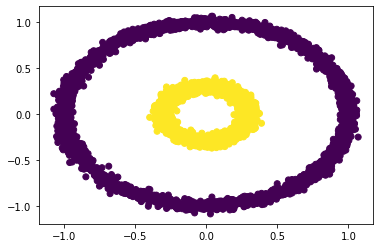

In [3]:
# Load some sample data
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)
plt.scatter(data[:, 0], data[:, 1], c=labels)

## Creating mapper graphs

Our goal is to create a mapper graph that has two components - each corresponding to a circle.<br>
The first step is to initialize a KeplerMapper object.

In [4]:
# Initialize mapper object
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


### Define lens / filter function

The lens function could be a scalar or a vector. We can simply use the x or y coordinates of the points. Or we can use something like the first or second principal component (or both..!!). We can also construct our own *lens* function. Just make sure it's a finite, real valued function. That is, each point in out dataset is assigned a finite real scalar or vector value.

In [5]:
# define a lens/filter function/projection
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# from sklearn.decomposition import PCA
# projected_data = PCA(n_components=1).fit_transform(data)

..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



### Define cover

Then we define the *cover*. To do so, we split the range of the *lens* function into specified number of intervals (*n_cubes*). Where the size of overlap between consecutive intervals is given as a percentage of interval length (*perc_overlap*). For example, if the range of the *lens* is (0-100) and we specify n_cube, perc_overlap equal to 2 and 0.1 respectively, then the two intervals we get are (0-60) and (50-100).<br>

Once the cover is defined, mapper will split the data so that all the data points that map to the same interval are put into the same chunk. Since the intervals overlap, there would be points that map to more than one interval and hence, belong to more than one chunk.

In [6]:
# define cover
cover = km.Cover(n_cubes=10, perc_overlap=0.3)

### Specify clustering algorithm

Next, we want to apply clustering to each chunk. So we specify our favorite clustering algorithm.<br>
The default algorithm used by mapper is DBSCAN, but we can use any clustering algorithm or indeed write our own if needed.<br>
Typically, one of the methods provided by scikit-learn's cluster modeule is used.

In [7]:
# define clustering algorithm
from sklearn.cluster import DBSCAN
clust_metric = 'euclidean'
clusterer = DBSCAN(metric=clust_metric)

### Construct mapper graph

Now, we have all the ingredients to construct the mapper graph.<br>
We use the `.map` method of the KepplerMapper object to construct the graph.

In [8]:
# Create mapper graph: a dictionary with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=cover, clusterer=clusterer)

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 142 edges and 67 nodes in 0:00:00.076731.


If you used the x,y coordinates as the *lens*, with n_cubes=10, mapper will create 10 intervals along each axis so that we end up with 100 *hypercubes*. The method will also tell you how many nodes and edges the graph has. Vary the n_cubes and perc_overlap parameters of the cover to see how the graph size changes.

### Visualize the mapper graph

Lastly, we will use the `visualize` method of KepplerMapper object to create a visualization and save it in an html file. There are other ways to create visualizations, we can export the graph to a standard graph package like networkx or igraph. But the html version is very convenient. We will create the html file and then load it into a frame below.

In the visualization, you can zoom in and out on parts of the graph.<br>
Click on the `+` sign in from of *cluster details* to open a panel on the left. When you hover over a node in the graph, this panel will display information about the cluster.<br>
Click on the `+` sign in from of *mapper summary* to open a panel on the right. This panel shows the parameters used to construct the mapper graph.

In [9]:
# Visualize the created graph
from helper_functions import colorscale_from_matplotlib_cmap
cscale = colorscale_from_matplotlib_cmap(plt.get_cmap('coolwarm'))

_ = mapper.visualize(graph,
                     path_html="./make_circles_mapper.html",
                     title="make_circles(n_samples=5000, noise=0.03, factor=0.3)",
                     color_values=labels,
                     colorscale=cscale,
                     color_function_name='labels'
                    )

IFrame(src="./make_circles_mapper.html", width=1000, height=800)

Wrote visualization to: ./make_circles_mapper.html
